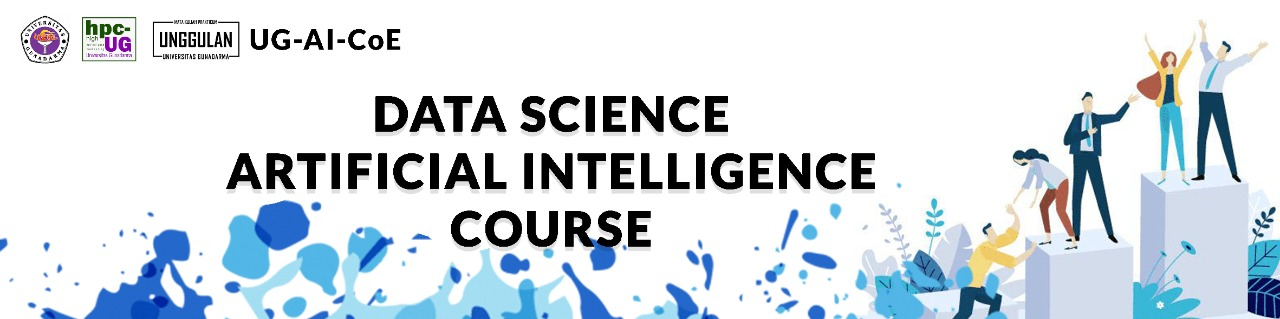

File ini merupakan hasil pengerjaan *final project* peserta yang dilakukan dalam kegiatan Kursus Data Science Universitas Gunadarma Periode 02 Juni - 14 Juni 2025 (Semester 8) untuk Skema Ilmuwan Data Madya (*Associate Data Scientist*).

---

# **Klasifikasi dan Analisis Rating Film Indonesia**

Disusun Oleh: <br>
  * Nama Mahasiswa: Gracio Habel Watumlawar <br>
  * NPM: 50421571 <br>
  * Kelas Kursus/Kelompok Kursus: Kelas 4/Kelompok 4 <br><br>

---

In [1]:
# EK 2 KUK 2.1 004
# metode dan tools pengambilan data diidentifikasi sesuai tujuan teknis data science

import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn

In [2]:
!{sys.executable} -m pip install scikit-learn

In [3]:
# EK 2 KUK 2.3 004

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler

## KODE UNIT J.62DM100.004.1 (MENGUMPULKAN DATA)

In [4]:
# EK 1 KUK 1.1 
# kebutuhan data diidentifikasikan sesuai tujuan teknis data science
df = pd.read_csv("indonesian_movies.csv")
df.head()

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min


In [5]:
# EK 1 KUK 1.2 
# Kebutuhan data diperiksa ketersediaanya sesuai aturan yang berlaku
print("Struktur Data:")
print(df.head())

Struktur Data:
                      title  year  \
0       #FriendButMarried 2  2020   
1                  4 Mantan  2020   
2  Aku Tahu Kapan Kamu Mati  2020   
3               Anak Garuda  2020   
4                 Dignitate  2020   

                                         description      genre rating  \
0  Ayudia (Mawar De Jongh) is not satisfied enoug...  Biography    13+   
1  Sara, Airin, Rachel, and Amara were accidental...   Thriller    17+   
2  After apparent death, Siena is able to see sig...     Horror    13+   
3  Good Morning Indonesia, a school for poor orph...  Adventure    13+   
4  Alfi (Al Ghazali) meets Alana (Caitlin Halderm...      Drama    17+   

   users_rating votes   languages          directors  \
0           6.5   120  Indonesian      Rako Prijanto   
1           6.4     8  Indonesian      Hanny Saputra   
2           5.4    17  Indonesian  Hadrah Daeng Ratu   
3           9.1    27  Indonesian       Faozan Rizal   
4           7.6    33  Indonesian    

In [6]:
#EK 1 KUK 1.3 
#Kebutuhan data ditentukan volumenya sesuai tujuan teknis data science
print("1.3 Jumlah data:", len(df))

1.3 Jumlah data: 1272


In [7]:
#EK 2 KUK2.2 
#Tool pengambilan data ditentukan sesuai jenis dan format data science
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
              year  users_rating
count  1272.000000   1272.000000
mean   2007.023585      6.144418
std      12.968560      1.389315
min    1926.000000      1.200000
25%    2006.000000      5.300000
50%    2011.000000      6.400000
75%    2016.000000      7.100000
max    2020.000000      9.400000


In [8]:
# EK 3 KUK 3.1
#Integritas data diperiksa sesuai tujuan teknis data science

print("\nJumlah Missing Value per Kolom:")
print(df.isnull().sum())


Jumlah Missing Value per Kolom:
title             0
year              0
description     432
genre            36
rating          896
users_rating      0
votes             0
languages         0
directors         7
actors            0
runtime         403
dtype: int64


In [9]:
#EK 3 KUK 3.2 
#Data yang tidak sesuai dibersihkan berdasarkan validasi integritas data
df_clean = df.dropna()

In [10]:
#EK 3 KUK 3.1 Integritas data diperiksa sesuai tujuan teknis data science
print("\n Jumlah Duplikat:")
print(df_clean.duplicated().sum())


 Jumlah Duplikat:
0


In [11]:
#EK 3 KUK 3.2 Data di integrasikan sesuai tujuan teknis data science
#integrasi kolom durasi film ke dalam satuan jam jika ada satuan kolom durasi film dalam satuan menit
if 'duration' in df_clean.columns:
    df_clean['duration_hours'] = df_clean['duration'] / 60

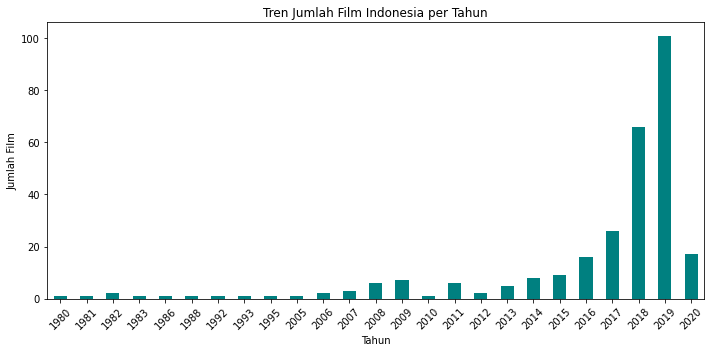

In [12]:
# visualisasi awal jumlah film Indonesia per Tahun
plt.figure(figsize=(10, 5))
df_clean['year'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title("Tren Jumlah Film Indonesia per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Film")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Industri film Indonesia mengalami pertumbuhan pesat dalam jumlah produksi film mulai dari pertengahan 2010-an.

Tahun 2019 adalah tahun paling produktif dalam dua dekade terakhir.

Penurunan tajam di tahun 2020 kemungkinan besar bukan karena tren penurunan minat, melainkan dampak dari faktor eksternal seperti pandemi.

Data ini menunjukkan perkembangan positif industri perfilman Indonesia dalam beberapa tahun terakhir sebelum pandemi.

## J.62DM100.005.1 (MENELAAH DATA)

In [13]:
#EK 1 KUK 1.1 
#Tipe data yang terkumpul diidentifikasi sesuai tujuan teknis

print("Tipe data setiap kolom:")
print(df_clean.dtypes)

Tipe data setiap kolom:
title            object
year              int64
description      object
genre            object
rating           object
users_rating    float64
votes            object
languages        object
directors        object
actors           object
runtime          object
dtype: object


In [14]:
#EK 1 KUK 1.2 
#Nilai atribut dari data yang terkumpul diuraikan sesuai dengan batasan konteks bisnisnya

print("Contoh nilai atribut:")
for col in df_clean.columns:
    print(f"{col} -> {df_clean[col].unique()[:5]}")

Contoh nilai atribut:
title -> ['#FriendButMarried 2' '4 Mantan' 'Aku Tahu Kapan Kamu Mati' 'Anak Garuda'
 'Dignitate']
year -> [2020 2019 2018 2017 2016]
description -> ['Ayudia (Mawar De Jongh) is not satisfied enough in enjoying the moment as a wife, but she suddenly becomes pregnant. Her personality changes completely and becomes lazy and super sensitive.'
 'Sara, Airin, Rachel, and Amara were accidentally brought together after the death of their ex, Alex. All four received a letter saying that there was one killer among them.'
 'After apparent death, Siena is able to see signs that people will die. However, her friends did not believe in her abilities. Then, the sign appeared on her and those closest to her.'
 'Good Morning Indonesia, a school for poor orphans, invites seven children to become a team. But, jealousy and envy started because of the hidden love between them. They are sent to Europe without accompany, and the conflicts are exploded.'
 'Alfi (Al Ghazali) meets Alana (

In [15]:
#EK 1 KUK 1.3 
# Relasi antar data yang terkumpul diidentifikasi sesuai dengan tujuan teknis Korelasi antar variabel numerik

print("Korelasi antar variabel numerik:")
print(df_clean.corr(numeric_only=True))

Korelasi antar variabel numerik:
                  year  users_rating
year          1.000000      0.195891
users_rating  0.195891      1.000000


In [16]:
#EK 2 KUK 2.1 
#Karakteristik data yang terkumpul disajikan dengan deskripsi statistik dasar

print("Deskripsi statistik dasar:")
print(df_clean.describe())

Deskripsi statistik dasar:
              year  users_rating
count   286.000000    286.000000
mean   2015.972028      6.365035
std       6.547472      1.351763
min    1980.000000      1.200000
25%    2016.000000      5.600000
50%    2018.000000      6.600000
75%    2019.000000      7.300000
max    2020.000000      9.400000


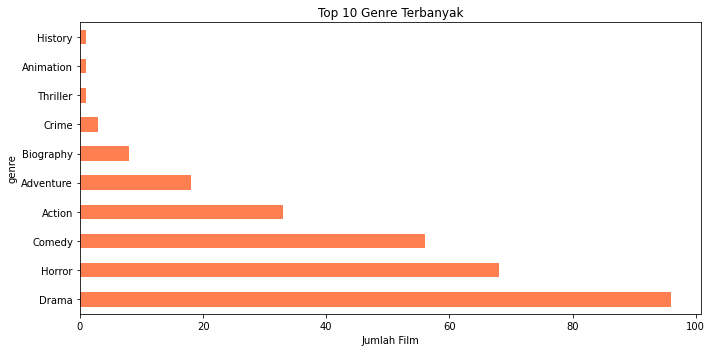

In [17]:
#EK 2 KUK 2.2 
#Karakteristik data yang terkumpul disajikan dengan visualisasi grafik 

if 'genre' in df_clean.columns:
    plt.figure(figsize=(10,5))
    df_clean['genre'].value_counts().head(10).plot(kind='barh', color='coral')
    plt.title("Top 10 Genre Terbanyak")
    plt.xlabel("Jumlah Film")
    plt.tight_layout()
    plt.show()

Genre drama merupakan genre yang paling populer atau paling sering diproduksi dalam industri film Indonesia.

Genre horor dan komedi juga sangat digemari, terbukti dari banyaknya jumlah film pada kategori ini.

Genre seperti history, animation, dan thriller masih tergolong niche atau kurang populer, mungkin karena keterbatasan pasar, biaya produksi, atau minat penonton yang lebih kecil.

Distribusi ini dapat mencerminkan preferensi penonton Indonesia dan juga strategi produser film lokal dalam memilih genre yang dianggap aman secara komersial.

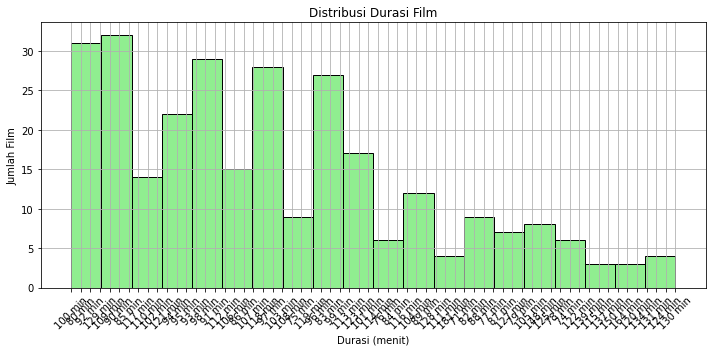

In [18]:
#EK 2 KUK 2.2 
#Karakteristik data yang terkumpul disajikan dengan visualisasi grafik 

plt.figure(figsize=(10, 5))  # Lebarkan gambar agar lebih luas
df_clean['runtime'].hist(bins=20, color='lightgreen', edgecolor='black')
plt.title("Distribusi Durasi Film")
plt.xlabel("Durasi (menit)")
plt.ylabel("Jumlah Film")
plt.xticks(rotation=45)  # Rotasi label sumbu-x agar lebih terbaca
plt.tight_layout()
plt.show()

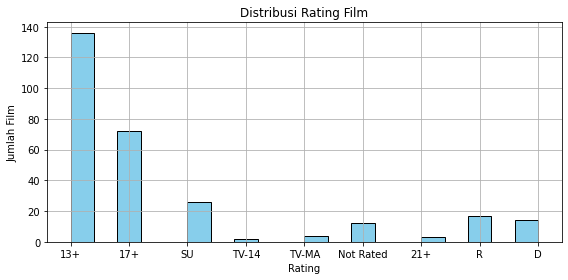

In [19]:
#EK 2 KUK 2.2 
#Karakteristik data yang terkumpul disajikan dengan visualisasi grafik 

if 'rating' in df_clean.columns:
    plt.figure(figsize=(8, 4))
    df_clean['rating'].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title("Distribusi Rating Film")
    plt.xlabel("Rating")
    plt.ylabel("Jumlah Film")
    plt.tight_layout()
    plt.show()

Sebagian besar film Indonesia dalam dataset ini ditujukan untuk penonton remaja dan dewasa (13+ dan 17+).

Film ramah anak (SU) jumlahnya relatif sedikit.

Banyak film belum diberi rating yang jelas (Not Rated), yang bisa menjadi catatan untuk keperluan klasifikasi atau penyensoran.

Distribusi ini menunjukkan bahwa konten dewasa dan remaja mendominasi dalam perfilman Indonesia.

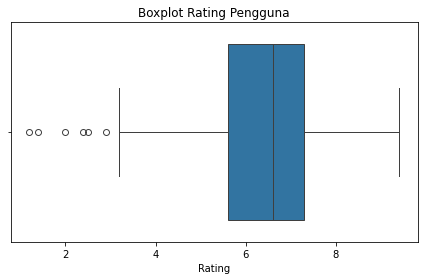

In [20]:
#EK 2 KUK 2.2 
#Karakteristik data yang terkumpul disajikan dengan visualisasi grafik 

plt.figure(figsize=(6, 4))
sns.boxplot(x=df_clean['users_rating'])
plt.title("Boxplot Rating Pengguna")
plt.xlabel("Rating")
plt.tight_layout()
plt.show()

Sebagian besar film Indonesia dalam dataset ini mendapatkan rating sedang hingga cukup tinggi dari pengguna.

Sebagian kecil film mendapatkan rating sangat rendah, yang terlihat sebagai outlier di sisi kiri.

Distribusi rating condong ke kiri (skewness negatif ringan), artinya film-film cenderung lebih sering dinilai baik daripada buruk oleh pengguna.



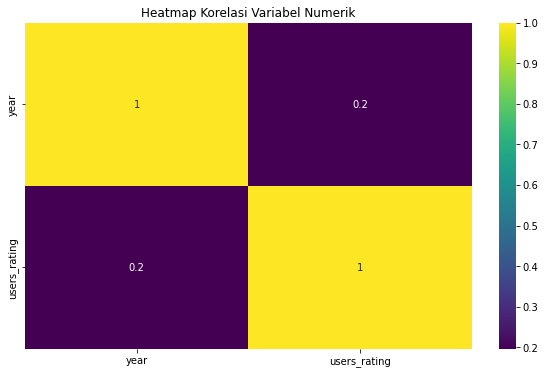

In [21]:
#EK 2 KUK 2.2 
#Karakteristik data yang terkumpul disajikan dengan visualisasi grafik 

plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='viridis')
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

Tidak terdapat hubungan yang kuat antara tahun rilis film (year) dengan rating pengguna (users_rating).

Artinya, film yang lebih baru tidak serta merta mendapatkan rating lebih tinggi dibandingkan film lama—begitu pula sebaliknya.

Korelasi 0.2 hanya menunjukkan sedikit kecenderungan positif, namun tidak cukup kuat untuk dijadikan dasar pengambilan keputusan.

In [22]:
#EK 2 KUK 2.3 
#Hasil penyajian data dianalisis karakteristiknya untuk telaah data

#Membersihkan kolom runtime dari string " min" dan mengubah ke float
df_clean['runtime'] = df_clean['runtime'].str.replace(' min', '', regex=False).astype(float)

#Menghitung rata-rata durasi untuk film dengan rating tinggi dan rendah
mean_duration_high = df_clean[df_clean['users_rating'] >= 8]['runtime'].mean()
mean_duration_low = df_clean[df_clean['users_rating'] < 8]['runtime'].mean()

#Menampilkan hasil analisis
print("Analisis dan Pembandingan:")
print(f"Rata-rata durasi film dengan rating >= 8: {mean_duration_high:.2f} menit")
print(f"Rata-rata durasi film dengan rating < 8 : {mean_duration_low:.2f} menit")

#Menyimpulkan apakah rating tinggi berkaitan dengan durasi lebih panjang
if mean_duration_high > mean_duration_low:
    print("Film dengan rating tinggi cenderung memiliki durasi lebih panjang.")
else:
    print("Film dengan rating tinggi tidak memiliki durasi yang lebih panjang.")


Analisis dan Pembandingan:
Rata-rata durasi film dengan rating >= 8: 103.80 menit
Rata-rata durasi film dengan rating < 8 : 99.11 menit
Film dengan rating tinggi cenderung memiliki durasi lebih panjang.


/tmp/ipykernel_1135476/2085367799.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['runtime'] = df_clean['runtime'].str.replace(' min', '', regex=False).astype(float)


In [23]:
#EK 3 KUK 3.1 Hasil analisis didokumentasikan dalam bentuk laporan sesuai tujuan teknis data science

output_dir = "data_output"
os.makedirs(output_dir, exist_ok=True)

df_clean.describe().to_csv(f"{output_dir}/deskripsi_statistik_Film_Indonesia.csv")
print(f"File disimpan ke: {output_dir}/deskripsi_statistik_Film_Indonesia.csv")

File disimpan ke: data_output/deskripsi_statistik_Film_Indonesia.csv


In [24]:
#EK 3 KUK 3.2 
#Hipotesis disusun berdasar hasil analisis sesuai tujuan teknis data science

# Menyusun hipotesis dari hasil analisis durasi vs rating
hipotesis = """
Hipotesis:
Film Indonesia dengan rating pengguna yang tinggi (>= 8) cenderung memiliki durasi tayang yang lebih panjang dibandingkan dengan film yang memiliki rating lebih rendah (< 8).
Hal ini diasumsikan karena film dengan kualitas cerita, produksi, atau elemen sinematik yang baik—yang biasanya mendapat rating tinggi—cenderung memerlukan waktu tayang yang lebih panjang untuk menyampaikan narasinya secara utuh.
"""

# Menampilkan hipotesis
print(hipotesis)


Hipotesis:
Film Indonesia dengan rating pengguna yang tinggi (>= 8) cenderung memiliki durasi tayang yang lebih panjang dibandingkan dengan film yang memiliki rating lebih rendah (< 8).
Hal ini diasumsikan karena film dengan kualitas cerita, produksi, atau elemen sinematik yang baik—yang biasanya mendapat rating tinggi—cenderung memerlukan waktu tayang yang lebih panjang untuk menyampaikan narasinya secara utuh.



In [25]:
# menelaah kolom numerik rating pengguna
kolom_usersrating = 'users_rating'

if kolom_usersrating in df.columns:
    data = df[kolom_usersrating].dropna()

    print(f"\nStatistik untuk kolom: {kolom_usersrating}")
    print("-" * 40)
    print("Maksimum :", data.max())
    print("Minimum :", data.min())
    print("Rata-rata :", data.mean())
    print("Median :", data.median())
    print("Modus :", data.mode().iloc[0])


Statistik untuk kolom: users_rating
----------------------------------------
Maksimum : 9.4
Minimum : 1.2
Rata-rata : 6.144418238993711
Median : 6.4
Modus : 7.2


## J.62DM100.006.1 (MEMVALIDASI DATA)

In [26]:
#EK 1 KUK 1.1
#Penilaian kualitas data dari hasil telaah disajikan sesuai tujuan teknis data science. 

print("Jumlah nilai kosong per kolom:")
print(df.isnull().sum())

#EK 1 KUK 1.1 
#Penilaian kualitas data dari hasil telaah disajikan sesuai tujuan teknis data science. 

print("\nPersentase data kosong per kolom:")
print(df.isnull().mean() * 100)

Jumlah nilai kosong per kolom:
title             0
year              0
description     432
genre            36
rating          896
users_rating      0
votes             0
languages         0
directors         7
actors            0
runtime         403
dtype: int64

Persentase data kosong per kolom:
title            0.000000
year             0.000000
description     33.962264
genre            2.830189
rating          70.440252
users_rating     0.000000
votes            0.000000
languages        0.000000
directors        0.550314
actors           0.000000
runtime         31.682390
dtype: float64


In [27]:
#EK 1 KUK 1.2 
#Penilaian tingkat kecukupan data dari hasil telaah disajikan sesuai tujuan teknis data science. 

total_cells = df.shape[0] * df.shape[1]
total_missing = df.isnull().sum().sum()
integrity_percent = ((total_cells - total_missing) / total_cells) * 100

print(f"\nTingkat keutuhan data: {integrity_percent:.2f}%")


Tingkat keutuhan data: 87.32%


In [28]:
#EK 2 KUK 2.1 
#Rekomendasi hasil penilaian kualitas disusun sesuai tujuan teknis data science
print("\nRekomendasi Kualitas Data:")
if df.isnull().sum().sum() == 0:
    print("Data tidak memiliki nilai kosong. Kualitas data baik.")
else:
    print("Terdapat nilai kosong. Disarankan untuk melakukan imputasi atau pembersihan data.")



Rekomendasi Kualitas Data:
Terdapat nilai kosong. Disarankan untuk melakukan imputasi atau pembersihan data.


In [29]:
#EK 2 KUK 2.2 
#Rekomendasi hasil penilaian kecukupan data disusun sesuai tujuan teknis data science.

print("\nRekomendasi Keutuhan Data:")
if integrity_percent >= 95:
    print("Keutuhan data sangat baik. Data dapat langsung digunakan untuk analisis.")
elif integrity_percent >= 85:
    print("Keutuhan data cukup. Beberapa pembersihan atau imputasi diperlukan.")
else:
    print("Keutuhan data rendah. Diperlukan pembersihan dan perbaikan signifikan.")



Rekomendasi Keutuhan Data:
Keutuhan data cukup. Beberapa pembersihan atau imputasi diperlukan.


## J.62DM100.007.1 (Menentukan Objek Data)

In [30]:
#EK 1 KUK 1.1
#Kriteria pemilihan data diidentifikasi sesuai dengan tujuan teknis dan aturan yang berlaku

kriteria_df = df_clean[(df_clean['year'] >= 2015) & (df_clean['users_rating'] >= 7.0)]
print(f"Data terpilih berdasarkan kriteria:\nJumlah baris: {kriteria_df.shape[0]}")

Data terpilih berdasarkan kriteria:
Jumlah baris: 99


In [31]:
#EK 1 KUK 1.2
#Teknik pemilihan data ditetapkan sesuai dengan kriteria pemilihan data

sampled_df = kriteria_df.sample(frac=0.3, random_state=42)
print(f"Jumlah data setelah sampling: {sampled_df.shape[0]}")


Jumlah data setelah sampling: 30


In [32]:
#EK 2 KUK 2.1
# Attributes (columns) data diidentifikasi sesuai dengan kriteria pemilihan data.

selected_columns = ['title', 'year', 'genre', 'runtime', 'users_rating']
filtered_df = sampled_df[selected_columns]
print("Kolom yang dipilih:", filtered_df.columns.tolist())

Kolom yang dipilih: ['title', 'year', 'genre', 'runtime', 'users_rating']


In [33]:
#EK 2 KUK 2.2
#Records (row) data diidentifikasi sesuai dengan kriteria pemilihan data. 

print("\nContoh records data terpilih:")
print(filtered_df.head())


Contoh records data terpilih:
                      title  year      genre  runtime  users_rating
184           Love for Sale  2018      Drama    100.0           7.4
114  Susi Susanti: Love All  2019  Biography     96.0           7.5
359         Winter in Tokyo  2016    Romance    103.0           7.8
43           Dua Garis Biru  2019      Drama    113.0           8.0
365           About A Woman  2015      Drama     76.0           8.6


## J.62DM100.008.1 (Membersihkan Data)

In [34]:
print(df.isnull().sum())

title             0
year              0
description     432
genre            36
rating          896
users_rating      0
votes             0
languages         0
directors         7
actors            0
runtime         403
dtype: int64


In [35]:
#EK 1 KUK 1.1 
#Strategi pembersihan data ditentukan berdasarkan hasil telaah data. 

df_before_cleaning = df.copy()

kolom_description_cleaning = 'description'
kolom_rating_cleaning = 'rating'
#EK 1 KUK 1.2 Data yang kotor dikoreksi berdasarkan strategi pembersihan data. 
df.dropna(subset=[kolom_description_cleaning], inplace=True)
df.dropna(subset=[kolom_rating_cleaning], inplace=True)

df_after_cleaning = df.copy()

#EK 2 KUK 2.2 Evaluasi dihasilkan berdasarkan analisis koreksi yang telah dilakukan. 
print("Jumlah data sebelum cleaning:", len(df_before_cleaning))
print("Jumlah data setelah cleaning:", len(df_after_cleaning))

#EK 2 KUK 2.3 Evaluasi proses dan hasilnya didokumentasikan. 
print("\nJumlah data yang dihapus:", len(df_before_cleaning) - len(df_after_cleaning))

Jumlah data sebelum cleaning: 1272
Jumlah data setelah cleaning: 352

Jumlah data yang dihapus: 920


In [36]:
#EK 2 KUK 2.1
#Masalah dan teknis koreksi data dideskripsikan sesuai dengan kondisi data dan strategi pembersihan data

print("\n kolom deskripsi cukup mengganggu proses olah data dikarenakan memiliki teks teks yang kurang dibutuhkan untuk proses modeling data kedepannya serta rating usia film juga sama kurang dibutuhkannya untuk proses olah data kedepannya, penghapusan atau drop kolom deskripsi dan rating usia film agar tidak mengganggu proses modeling data kedepannya")


 kolom deskripsi cukup mengganggu proses olah data dikarenakan memiliki teks teks yang kurang dibutuhkan untuk proses modeling data kedepannya serta rating usia film juga sama kurang dibutuhkannya untuk proses olah data kedepannya, penghapusan atau drop kolom deskripsi dan rating usia film agar tidak mengganggu proses modeling data kedepannya


In [37]:
#EK 2 KUK 2.2
#Evaluasi dihasilkan berdasarkan analisis koreksi yang telah dilakukan. 
print(df.isnull().sum())

title            0
year             0
description      0
genre            1
rating           0
users_rating     0
votes            0
languages        0
directors        1
actors           0
runtime         65
dtype: int64


## J.62DMI00.009.1 (Mengkrontuksi Data)

In [38]:
#EK1 KUK1.1
#Analisis data untuk menentukan representasi fitur data awal

print("Struktur Data:")

#EK2 KUK 1.2
#Analisis representasi fitur data awal untuk menentukan teknik rekayasa fitur yang diperlukan untuk pembangunan model data science.
print(df.head())

Struktur Data:
                      title  year  \
0       #FriendButMarried 2  2020   
1                  4 Mantan  2020   
2  Aku Tahu Kapan Kamu Mati  2020   
3               Anak Garuda  2020   
4                 Dignitate  2020   

                                         description      genre rating  \
0  Ayudia (Mawar De Jongh) is not satisfied enoug...  Biography    13+   
1  Sara, Airin, Rachel, and Amara were accidental...   Thriller    17+   
2  After apparent death, Siena is able to see sig...     Horror    13+   
3  Good Morning Indonesia, a school for poor orph...  Adventure    13+   
4  Alfi (Al Ghazali) meets Alana (Caitlin Halderm...      Drama    17+   

   users_rating votes   languages          directors  \
0           6.5   120  Indonesian      Rako Prijanto   
1           6.4     8  Indonesian      Hanny Saputra   
2           5.4    17  Indonesian  Hadrah Daeng Ratu   
3           9.1    27  Indonesian       Faozan Rizal   
4           7.6    33  Indonesian    

In [39]:
from sklearn.preprocessing import MinMaxScaler

#EK2 KUK2.1
#Transformasi dilakukan untuk mendapatkan fitur data awal
scaler = MinMaxScaler()

#EK2 KUK2.2 Rekayasa fitur data dilakukan untuk mendapatkan fitur baru yang diperlukan untuk pembangunan model data science
df_clean['durasi_normal'] = scaler.fit_transform(df_clean[['runtime']])

/tmp/ipykernel_1135476/405749059.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['durasi_normal'] = scaler.fit_transform(df_clean[['runtime']])


In [40]:
# Encoding genre (one-hot)
df_encoded = pd.get_dummies(df_clean, columns=['genre'], prefix='genre')

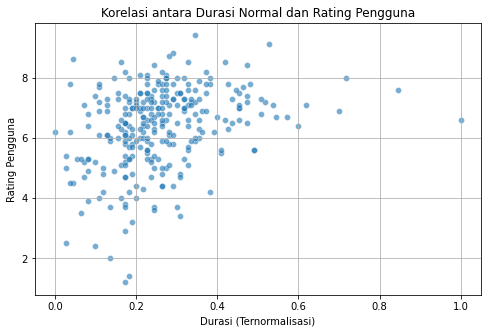

In [41]:
#EK 3 KUK 2.3
#Teknis transformasi data dijabarkan dalam bentuk tertulis

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='durasi_normal', y='users_rating', alpha=0.6)
plt.title('Korelasi antara Durasi Normal dan Rating Pengguna')
plt.xlabel('Durasi (Ternormalisasi)')
plt.ylabel('Rating Pengguna')
plt.grid(True)
plt.show()

Korelasi antara durasi film dan rating pengguna sangat lemah atau hampir tidak ada. Ini berarti panjang film tidak menentukan apakah film akan disukai oleh penonton.

Durasi bukan faktor signifikan dalam memengaruhi persepsi atau penilaian pengguna terhadap film.

Meskipun film berdurasi pendek lebih umum, kualitas konten tetap menjadi faktor utama dalam penilaian pengguna.

## J.62DM100.010.1 (Menentukan Label Data)

In [42]:
#EK1 KUK1.1 Analisis Pelabelan Data sejenis yang sudah ada diuraikan kesesuaiannya dengan standard Operating
#procedure(SOP) Pelabelan
df_clean = df_clean.copy()

#EK1 KUK 1.2 Pelabelan data dilakukan sesuai dengan SOP pelabelan
df_clean['label_rating'] = df_clean['users_rating'].apply(lambda x: 'high' if x >= 8 else 'low')

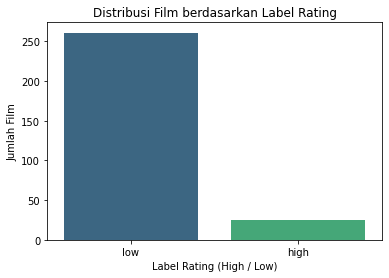

In [43]:
#EK 2 KUK 2.1 Statistik Hasil pelabelan diuraikan pada laporan
import matplotlib.pyplot as plt
import seaborn as sns

# Buat DataFrame kecil dari value_counts
label_df = df_clean['label_rating'].value_counts().reset_index()
label_df.columns = ['label_rating', 'count']

#EK 2 KUK 2.2 Evaluasi proses pelabelan diuraikan pada laporan
# Plot tanpa warning
sns.barplot(data=label_df, x='label_rating', y='count', hue='label_rating', palette='viridis', dodge=False, legend=False)
plt.title('Distribusi Film berdasarkan Label Rating')
plt.xlabel('Label Rating (High / Low)')
plt.ylabel('Jumlah Film')
plt.show()

Sebagian besar film dalam dataset memiliki rating rendah. Ini bisa berarti bahwa rata-rata kualitas atau penerimaan film Indonesia dalam dataset tersebut cenderung belum memuaskan (berdasarkan metrik rating yang digunakan).

## J.62DMI00.013.1 (Membangun Model)

In [44]:
#EK 2 KUK 2.1 Tools untuk membuat model diidentifikasi sesuai dengan tujuan teknis data science. 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


# EK 1 KUK 1.1 Parameter-parameter yang sesuai dengan model diidentifikasi. 

# Asumsi sudah ada df_clean
df_clean['label_rating'] = df_clean['users_rating'].apply(lambda x: 'high' if x >= 8 else 'low')

# Salin data
df_encoded = df_clean.copy()

# Ambil tahun unik
tahun_unik = sorted(df_encoded['year'].dropna().unique())
hasil_per_tahun = []

# EK 2. KUK 2.2 Algoritma untuk teknik pemodelan yang ditentukan dibangun menggunakan tools yang dipilih. 
for tahun in tahun_unik:
    data_tahun = df_encoded[df_encoded['year'] == tahun]
    
# EK 1 KUK 1.2 Nilai toleransi parameter evaluasi pengujian ditetapkan sesuai dengan tujuan teknis. 
    if len(data_tahun['label_rating'].unique()) < 2 or len(data_tahun) < 10:
        continue

    # Ambil hanya kolom numerik
    X = data_tahun.drop(['label_rating', 'year', 'users_rating'], axis=1, errors='ignore')
    X = X.select_dtypes(include=['number'])
    y = data_tahun['label_rating']

    if X.shape[1] == 0:
        continue
# EK 2 KUK 2.3 Algoritma pemodelan dieksekusi sesuai dengan skenario pengujian dan tools untuk membuat model yang telah ditetapkan. 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
#EK 2 KUK2.4 Parameter model algoritma dioptimasi untuk menghasilkan nilai parameter evaluasi yang sesuai dengan skenario pengujian. 
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    akurasi = accuracy_score(y_test, y_pred) 
    
    hasil_per_tahun.append({'year': tahun, 'accuracy': akurasi})


In [45]:
#EK 2 KUK2.4 Parameter model algoritma dioptimasi untuk menghasilkan nilai parameter evaluasi yang sesuai dengan skenario pengujian. 
print(f"Akurasi: {akurasi * 100:.2f}%")

Akurasi: 83.33%


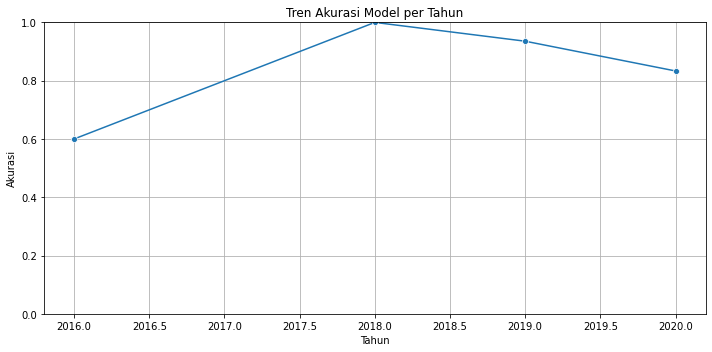

In [46]:
# Tampilkan hasil
df_hasil = pd.DataFrame(hasil_per_tahun)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_hasil, x='year', y='accuracy', marker='o')
plt.title('Tren Akurasi Model per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

Akurasi model meningkat tajam dari 2016 hingga 2018.

Setelah 2018, terjadi penurunan performa, walaupun masih berada dalam kisaran akurasi yang cukup tinggi (di atas 0.8).

Ini bisa menunjukkan bahwa model mengalami overfitting di 2018, atau data/testing di tahun-tahun setelahnya lebih kompleks.

## J.62DMI00.014.1 (Mengevaluasi Hasil Pemodelan)

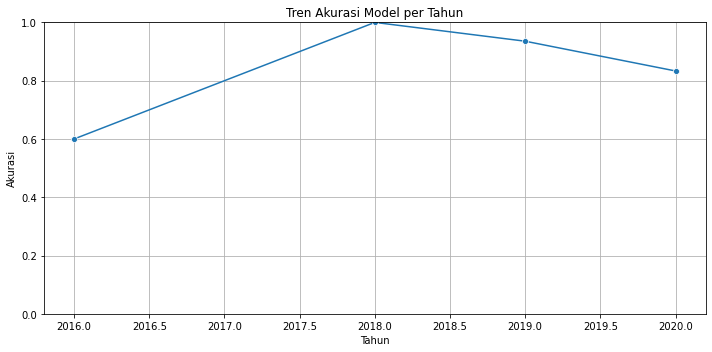

In [47]:
#EK 2 KUK 2.1 Keluaran pengujian model dinilai berdasarkan metrik kesuksesan. 


df_hasil = pd.DataFrame(hasil_per_tahun)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_hasil, x='year', y='accuracy', marker='o')
plt.title('Tren Akurasi Model per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
#EK 2 KUK 2.2 Hasil penilaian didokumentasikan sesuai standar yang berlaku. 
print("""
Berdasarkan grafik "Tren Akurasi Model per Tahun" yang Anda berikan, berikut adalah analisis dan interpretasinya:

Analisis Tren Akurasi Model:

Tahun 2016: Akurasi model dimulai pada sekitar 0.6 (atau 60%). Ini adalah titik awal akurasi model Anda.
Peningkatan Tajam hingga 2018: Dari tahun 2016 hingga 2018, terjadi peningkatan akurasi yang sangat signifikan.

Akurasi mencapai puncaknya di tahun 2018, yaitu tepat pada 1.0 (atau 100%). 
Ini menunjukkan bahwa model Anda mencapai kinerja yang sempurna pada tahun tersebut.
Penurunan Akurasi setelah 2018: Setelah mencapai puncaknya di tahun 2018, akurasi model mengalami penurunan.
Dari 2018 ke 2019, akurasi turun menjadi sekitar 0.95 (atau 95%).
Dari 2019 ke 2020, akurasi terus menurun menjadi sekitar 0.83 (atau 83%).""")


Berdasarkan grafik "Tren Akurasi Model per Tahun" yang Anda berikan, berikut adalah analisis dan interpretasinya:

Analisis Tren Akurasi Model:

Tahun 2016: Akurasi model dimulai pada sekitar 0.6 (atau 60%). Ini adalah titik awal akurasi model Anda.
Peningkatan Tajam hingga 2018: Dari tahun 2016 hingga 2018, terjadi peningkatan akurasi yang sangat signifikan.

Akurasi mencapai puncaknya di tahun 2018, yaitu tepat pada 1.0 (atau 100%). 
Ini menunjukkan bahwa model Anda mencapai kinerja yang sempurna pada tahun tersebut.
Penurunan Akurasi setelah 2018: Setelah mencapai puncaknya di tahun 2018, akurasi model mengalami penurunan.
Dari 2018 ke 2019, akurasi turun menjadi sekitar 0.95 (atau 95%).
Dari 2019 ke 2020, akurasi terus menurun menjadi sekitar 0.83 (atau 83%).


---

Copyright © 2025 Kursus Data Science, Universitas Gunadarma


https://www.hpc-hub.gunadarma.ac.id/